# World Bank Data Visualisation

For this project, data visualisation were performed on six time series data sets of key economic & environmental indicators. The data were downloaded from the World Bank website. The following indicators were analysed:
- NY.GDP.MKTP.CD -> GDP (current US$) (GDP.csv)
- AG.LND.AGRI.ZS -> Agricultural land (% of land area) (agriculture_area.csv)
- AG.LND.FRST.ZS -> Forest area (% of land area) (forest_area.csv)
- EN.ATM.CO2E.PC -> CO2 emissions (metric tons per capita) (CO2_emission.csv)
- EG.CFT.ACCS.ZS -> Access to clean fuels and technologies for cooking (% of population) (clean_fuel_access.csv)
- EG.FEC.RNEW.ZS -> Renewable energy consumption (% of total final energy consumption) (renewable_consumption.csv)

#### Note: all relevant csv files have been downloaded & saved without modifications in '../main/datasets' folder.

For this project, analyses were only carried out for the top 10 countries with the largest economy:
- United States of America (USA)
- China (CHN)
- Japan (JPN)
- Germany (DEU)
- United Kingdom (GBR)
- India (IND)
- France (FRA)
- Italy (ITA)
- Canada (CAN)
- South Korea (KOR)

In [1]:
# For this EDA, pandas, matplotlib & seaborn were used.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- Data downloaded from the World Bank websites are arranged in a particular way: country names are shown as rows & years are shown as columns. While this format is human-friendly, it may not be ideal for plotting.
- In addition, when opened using a text editor application, such as NotePad or TextEdit, there are 4 rows on the top displaying the data source & the date in which the data were last updated.
- The top 4 rows need to be removed so that pandas can read the data and convert them to pandas dataframe. Afterwards, the entire table will be modified so that the years will be displayed in rows rather columns (i.e the table needs to be pivoted).
- To achieve this, a function (process_n_plot) has been written to allow for automatic data processing (see below). In principle, the function should work with any data sets downloaded from the World Bank website.
- Following data processing, the function also generates line graphs for each indicator.

In [5]:
# First, the 10 countries to be analysed are stored in a list.
selected_countries = ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'France', 'Italy', 'Canada', 'Korea, Rep.']

# The file paths for I/O operations are also defined here.
input_path = '../main/datasets/'
output_path_1 = '../main/processed_data/unpivot/'
output_path_2 = '../main/processed_data/pivot/'

In [34]:
def process_n_plot(csv_file, indicator_label):
    
    # This part of the function deletes the first 4 top lines & generates a new csv file.
    with open(input_path + csv_file, "r") as inpt:
        lines = inpt.readlines()
    with open(output_path_1 + csv_file, "w") as outpt:
        outpt.writelines(lines[4:271])

    # This part of the function reads the new csv file, creates a copy of 'Country Name' & 'Country Code' columns (to be joined again later after pivoting),
    # and drops 'Country Code', 'Indicator Name', 'Indicator Code' columns & the last blank column ('Unnamed: 66') because they won't be used.
    df = pd.read_csv(output_path_1 + csv_file)
    countrycode = df.iloc[:,0:2]
    df = df.drop(columns=['Indicator Name','Country Code', 'Indicator Code','Unnamed: 66'])
    
    # This part of the function pivots the table so that the years will be in rows (under a new 'Year' column)
    # and changes the column header of 'Country Name' to 'Country' for simplicity
    df_unpivot = df.melt(id_vars=['Country Name'], var_name='Year', value_name=indicator_label)
    df_unpivot.rename(columns={'Country Name': 'Country'}, inplace=True)

    # The pivotted table is now merged with the copy of 'Country Name' & 'Country Code' columns & the processed data is saved in a new csv file.
    df_merge = df_unpivot.merge(countrycode,left_on = 'Country', right_on = 'Country Name')
    df_merge.to_csv(output_path_2 + csv_file)
    print(f'{csv_file} has been processed')

    # For plotting, a new data frame containing only selected columns ('Year','Country','Country Code',indicator_label) for selected countries was generated.
    # In addition, the years under 'Year' column were converted to a proper datetime format.
    df_plot = df_merge[df_merge.Country.isin(selected_countries)][['Year','Country','Country Code',indicator_label]]
    df_plot['Year'] = pd.to_datetime(df_plot['Year'])

    # This part of the function creates lineplots from each of the processed data set
    fig = plt.figure(figsize=(15,8))
    sns.set_style('darkgrid')
    sns.lineplot(x = 'Year', y = indicator_label, data = df_plot, hue='Country Code', palette='rainbow', marker='o')
    plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
    plt.xlabel('Year', fontsize = 18)
    plt.ylabel(indicator_label, fontsize = 15)
    plt.title(indicator_label, fontsize = 18)
    plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
    plt.show()

GDP.csv has been processed


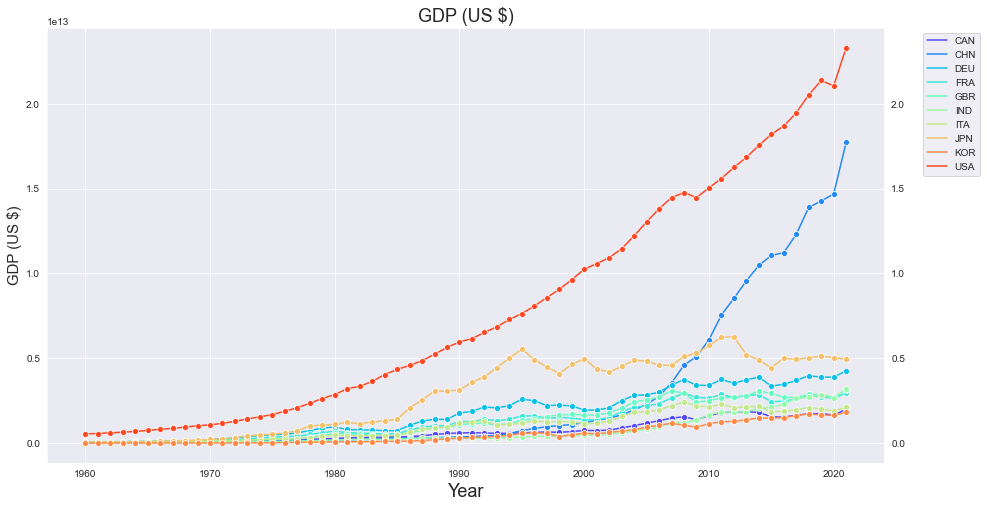

agriculture_area.csv has been processed


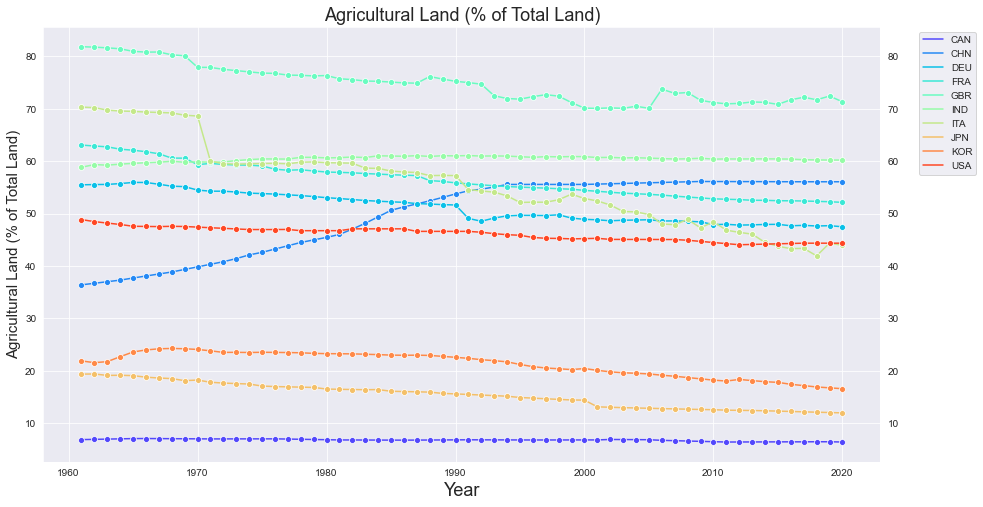

forest_area.csv has been processed


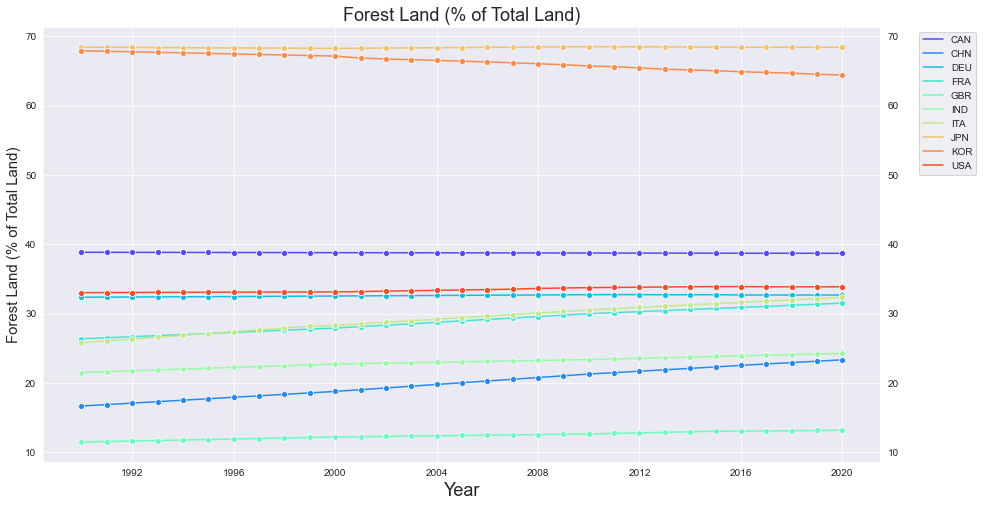

CO2_emission.csv has been processed


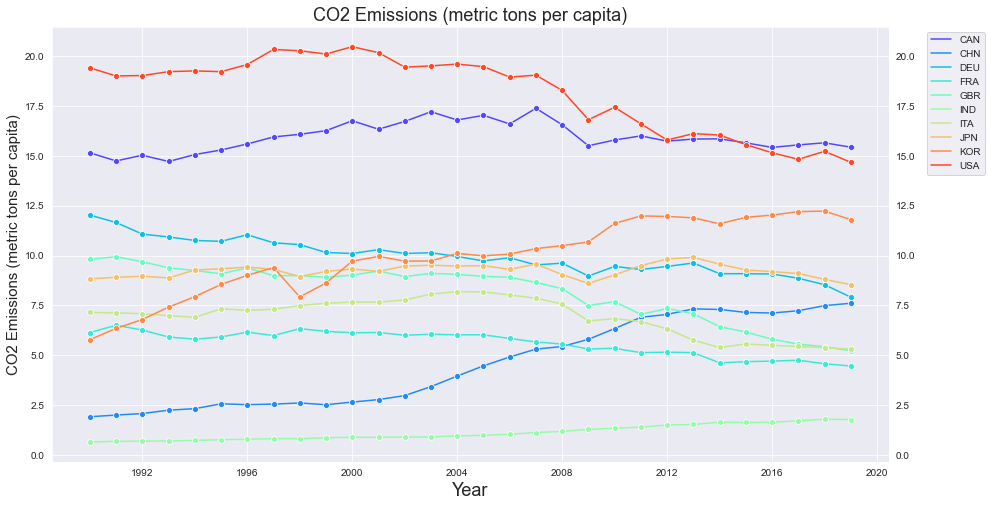

renewable_consumption.csv has been processed


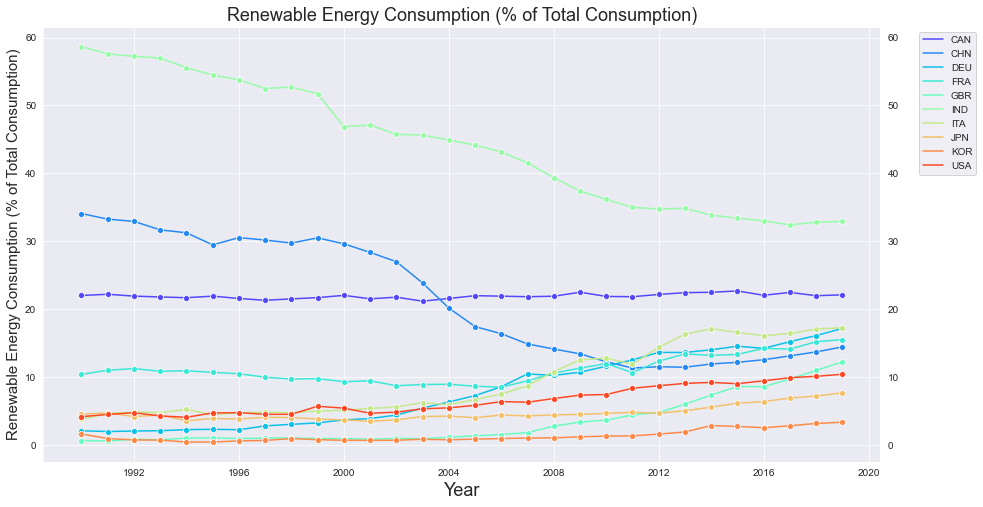

clean_fuel_access.csv has been processed


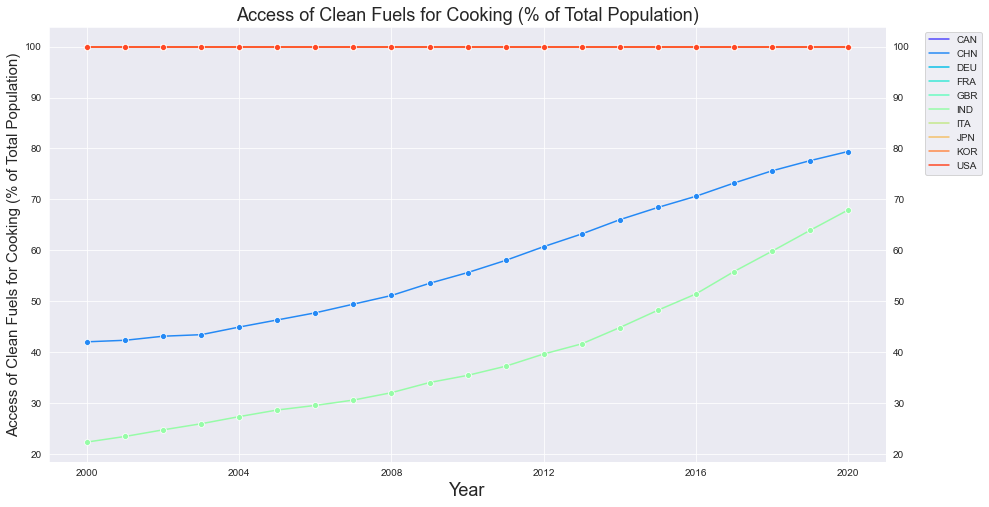

All data sets have been processed


In [35]:
# The process_n_plot function is then executed for all 6 indicators

gdp = process_n_plot(csv_file='GDP.csv', indicator_label='GDP (US $)')
agri = process_n_plot(csv_file='agriculture_area.csv', indicator_label='Agricultural Land (% of Total Land)')
frst = process_n_plot(csv_file='forest_area.csv', indicator_label='Forest Land (% of Total Land)')
co2_emission = process_n_plot(csv_file='CO2_emission.csv', indicator_label='CO2 Emissions (metric tons per capita)')
renewable_con = process_n_plot(csv_file='renewable_consumption.csv', indicator_label='Renewable Energy Consumption (% of Total Consumption)')
clean_fuel_acs = process_n_plot(csv_file='clean_fuel_access.csv', indicator_label='Access of Clean Fuels for Cooking (% of Total Population)')

print('All data sets have been processed')

First, several observations regarding the data can be made:
- Data for the 6 environmental and economic indicators are available for top 10 countries with the largest economy.
- However, data completeness across time varies. For example, data for GDP & agricultural land area are available from the 1960's to 2020. In contrast, for forest land area, CO2 emissions & renewable energy consumption, only data from the 1990's onwards are available. Lastly, for access to clean fuels for cooking, data recording only began in 2000.
- The missing data cannot be inferred simply because measurements or survey were not carried out prior to certain dates. In other words, the missing data here belong to the category of missing completely at random (MCAR). Backward projections can be attempted but these will not be accurate.
- Despite this, for data that are available, there is a data point for each consecutive year so that the trends can be observed. Therefore, data cleaning was not necessary.
- Generally speaking, GDP has been rising since the 1960's for all 10 countries.
- There are variations in trends among the 10 nations in terms of agricultural land area, CO2 emissions, renewable energy consumption, and access to clean fuels for cooking over time.
- Forest land areas within the 10 countries have been relatively steady over the last 30 years.

Extracting useful information from the plots above can be difficult in some cases due to the overlapping lines. Therefore, next, data on each indicator are visualised as heatmaps to provide a different perspective. To achieve this, another function (heatmap) was written below.

In [48]:
def heatmap(csv_file, indicator_label):
    
    # To generate the heatmaps, the unpivotted table can be used.
    # However, similar to the previous function, columns that won't be used were dropped ('Indicator Name','Country Code','Indicator Code','Unnamed: 66').
    heatmap_df = pd.read_csv(output_path_1 + csv_file)
    heatmap_df = heatmap_df.drop(columns=['Indicator Name','Country Code','Indicator Code','Unnamed: 66'])

    # The column name for 'Country Name' was changed again to 'Country' for simplicity.
    heatmap_df.rename(columns={'Country Name': 'Country'}, inplace=True)
    # A new data fram for heatmap generation was generated, only including the selected countries.
    heatmap_df = heatmap_df[heatmap_df.Country.isin(selected_countries)]
    # The country name was then set as the data frame index.
    heatmap_df.set_index('Country', inplace=True)
    print(f'{csv_file} has been processed')

    # This part of the function generates the heatmap.
    plt.figure(figsize = (18,5))
    plt.title(indicator_label, fontsize=20)
    sns.heatmap(heatmap_df, cmap='RdYlGn_r')
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Country', fontsize=15)
    plt.show()

GDP.csv has been processed


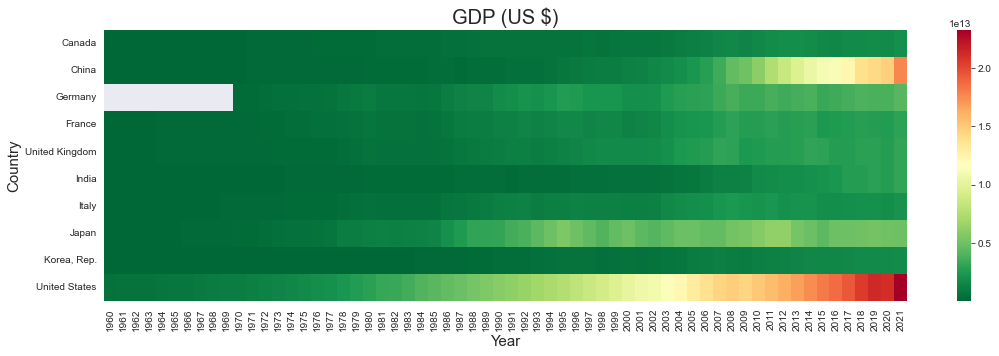

agriculture_area.csv has been processed


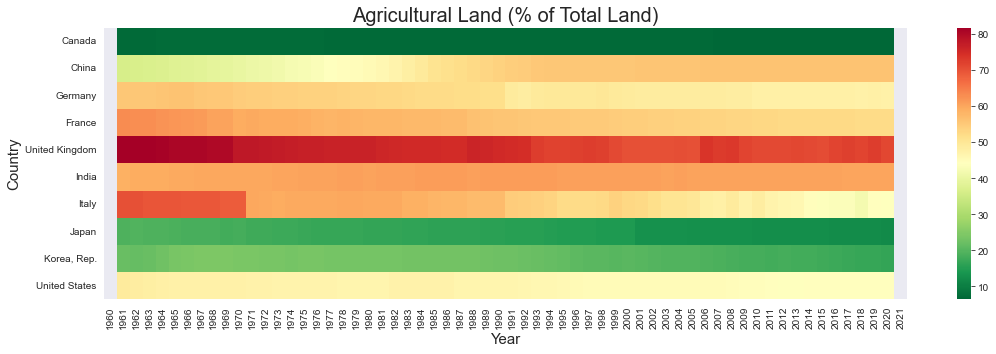

forest_area.csv has been processed


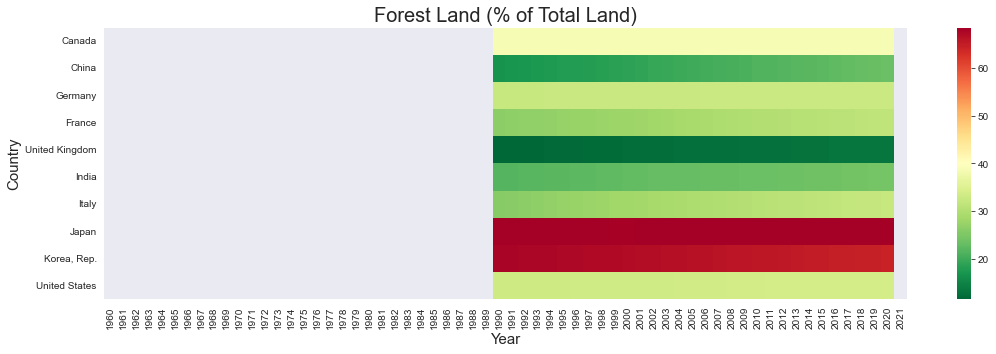

CO2_emission.csv has been processed


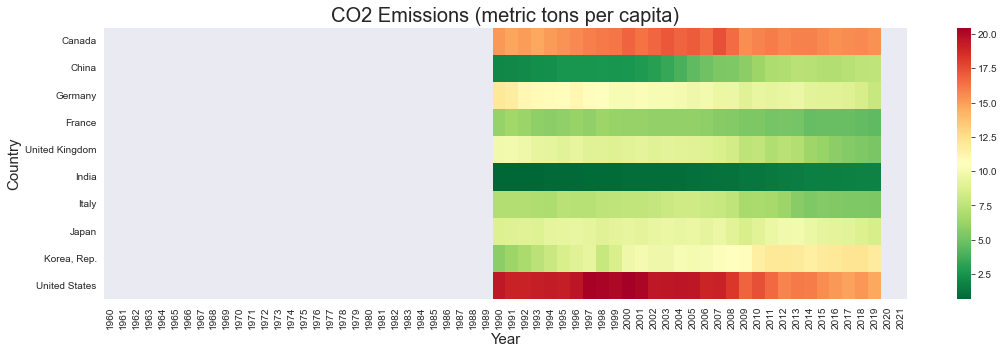

renewable_consumption.csv has been processed


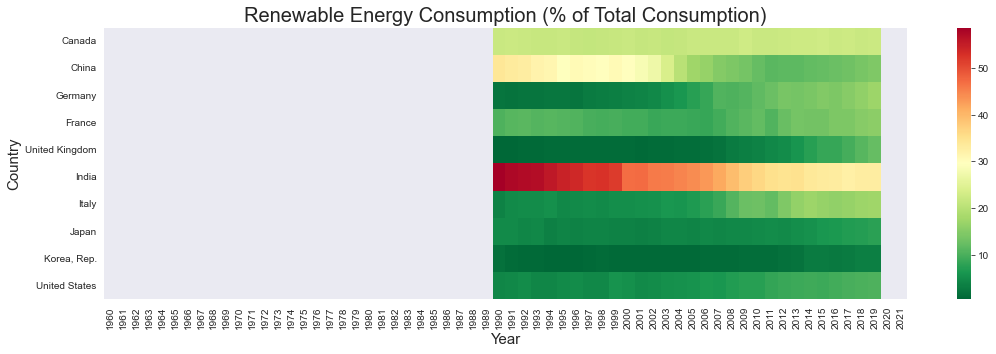

clean_fuel_access.csv has been processed


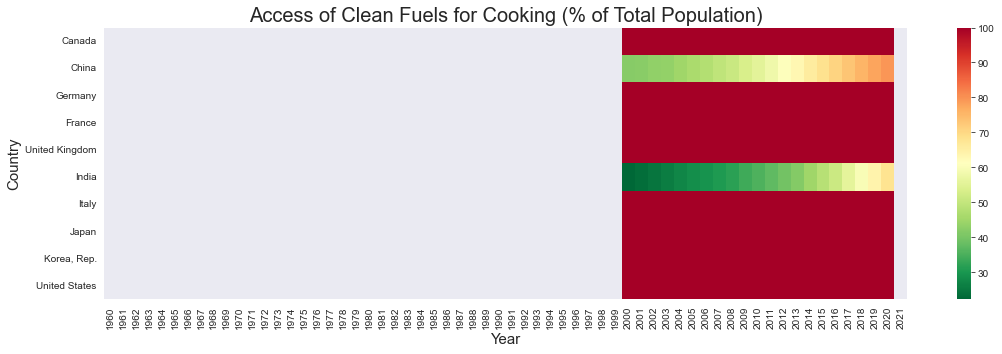

All data sets have been processed


In [49]:
# The heatmap function is then called for all 6 indicators.

gdp = heatmap(csv_file='GDP.csv', indicator_label='GDP (US $)')
agri = heatmap(csv_file='agriculture_area.csv', indicator_label='Agricultural Land (% of Total Land)')
frst = heatmap(csv_file='forest_area.csv', indicator_label='Forest Land (% of Total Land)')
co2_emission = heatmap(csv_file='CO2_emission.csv', indicator_label='CO2 Emissions (metric tons per capita)')
renewable_con = heatmap(csv_file='renewable_consumption.csv', indicator_label='Renewable Energy Consumption (% of Total Consumption)')
clean_fuel_acs = heatmap(csv_file='clean_fuel_access.csv', indicator_label='Access of Clean Fuels for Cooking (% of Total Population)')

print('All data sets have been processed')

The trends that have been mentioned above can be clearly seen with the heatmaps. With the line graph, it was not obvious that the majority of the 10 countries analysed here have 100% access of clean fuels for cooking apart from China and India. However, this pattern can clearly be seen in the heatmap.

Data sources:
- https://datatopics.worldbank.org/world-development-indicators/themes/environment.html
- https://finance.yahoo.com/news/22-biggest-economies-world-2022-144215864.html

Sources of ideas & inspirations:
- https://python.plainenglish.io/preprocessing-gdp-data-from-world-bank-and-visualize-the-trend-simple-tutorial-of-unpivoting-34ed5db9909b.
- https://deepnote.com/@charan-chandrasekaran/Data-extraction-from-World-bank-data-on-Top-6-Economies-2cdf8112-d412-4044-a58e-5e464804e9b6
- https://github.com/shwetajoshi601/world-bank-data-analysis/blob/master/world-bank-data-eda.ipynb